In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


In [2]:
df = pd.read_csv('Resources/card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [4]:
conti_variable = df[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']]
conti_variable.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
0,57.877857,0.311140,1.945940
1,10.829943,0.175592,1.294219
2,5.091079,0.805153,0.427715
3,2.247564,5.600044,0.362663
4,44.190936,0.566486,2.222767


array([[<AxesSubplot:title={'center':'distance_from_home'}>,
        <AxesSubplot:title={'center':'distance_from_last_transaction'}>],
       [<AxesSubplot:title={'center':'ratio_to_median_purchase_price'}>,
        <AxesSubplot:>]], dtype=object)

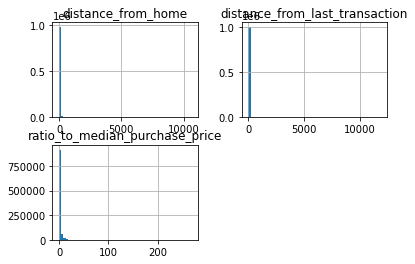

In [5]:
conti_variable.hist(bins=60)

In [6]:
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]

In [7]:
for x in conti_variable.columns:
    q25, q75 = conti_variable[x].quantile(0.25), conti_variable[x].quantile(0.75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    conti_variable[x+'_outlier'] = np.where((conti_variable[x]<lower) & (conti_variable[x]<upper),1,0) 
    
conti_variable.head()    

C:\Users\smei4\AppData\Local\Temp\ipykernel_12652\748586031.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conti_variable[x+'_outlier'] = np.where((conti_variable[x]<lower) & (conti_variable[x]<upper),1,0)
C:\Users\smei4\AppData\Local\Temp\ipykernel_12652\748586031.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conti_variable[x+'_outlier'] = np.where((conti_variable[x]<lower) & (conti_variable[x]<upper),1,0)
C:\Users\smei4\AppData\Local\Temp\ipykernel_12652\748586031.py:7: SettingWithCopyWarning: 

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,distance_from_home_outlier,distance_from_last_transaction_outlier,ratio_to_median_purchase_price_outlier
0,57.877857,0.311140,1.945940,0,0,0
1,10.829943,0.175592,1.294219,0,0,0
2,5.091079,0.805153,0.427715,0,0,0
3,2.247564,5.600044,0.362663,0,0,0
4,44.190936,0.566486,2.222767,0,0,0


# Unbalanced Data

<AxesSubplot:xlabel='fraud', ylabel='count'>

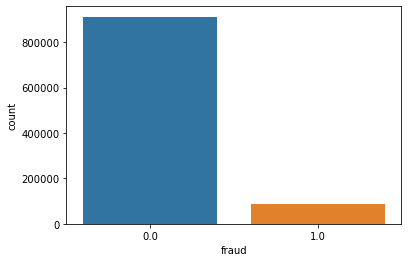

In [8]:
sns.countplot(x='fraud',data=df)

In [9]:
df = df.sample(frac=1)

fraud_df = df.loc[df['fraud'] == 1]
non_fraud_df = df.loc[df['fraud'] == 0][:87403]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df]).sample(frac=1, random_state=42)

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
625366,5.802280,0.111524,14.608713,1.0,0.0,0.0,1.0,1.0
373305,1.049655,0.731379,2.153245,0.0,1.0,0.0,1.0,0.0
41418,16.408530,0.052735,8.890921,1.0,1.0,1.0,1.0,0.0
986687,6.443675,6.690737,0.266716,1.0,1.0,0.0,1.0,0.0
90818,8.258625,0.818565,0.121786,1.0,0.0,0.0,1.0,0.0


Distribution of the Classes in the subsample dataset
1.0    0.5
0.0    0.5
Name: fraud, dtype: float64


C:\Users\smei4\Anaconda3\envs\PythonData38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


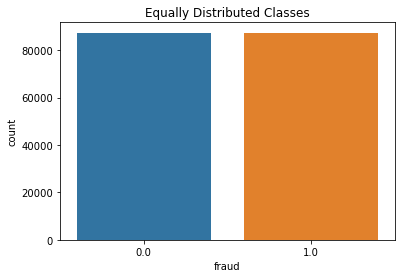

In [10]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['fraud'].value_counts()/len(new_df))

sns.countplot('fraud', data=new_df)
plt.title('Equally Distributed Classes')
plt.show()

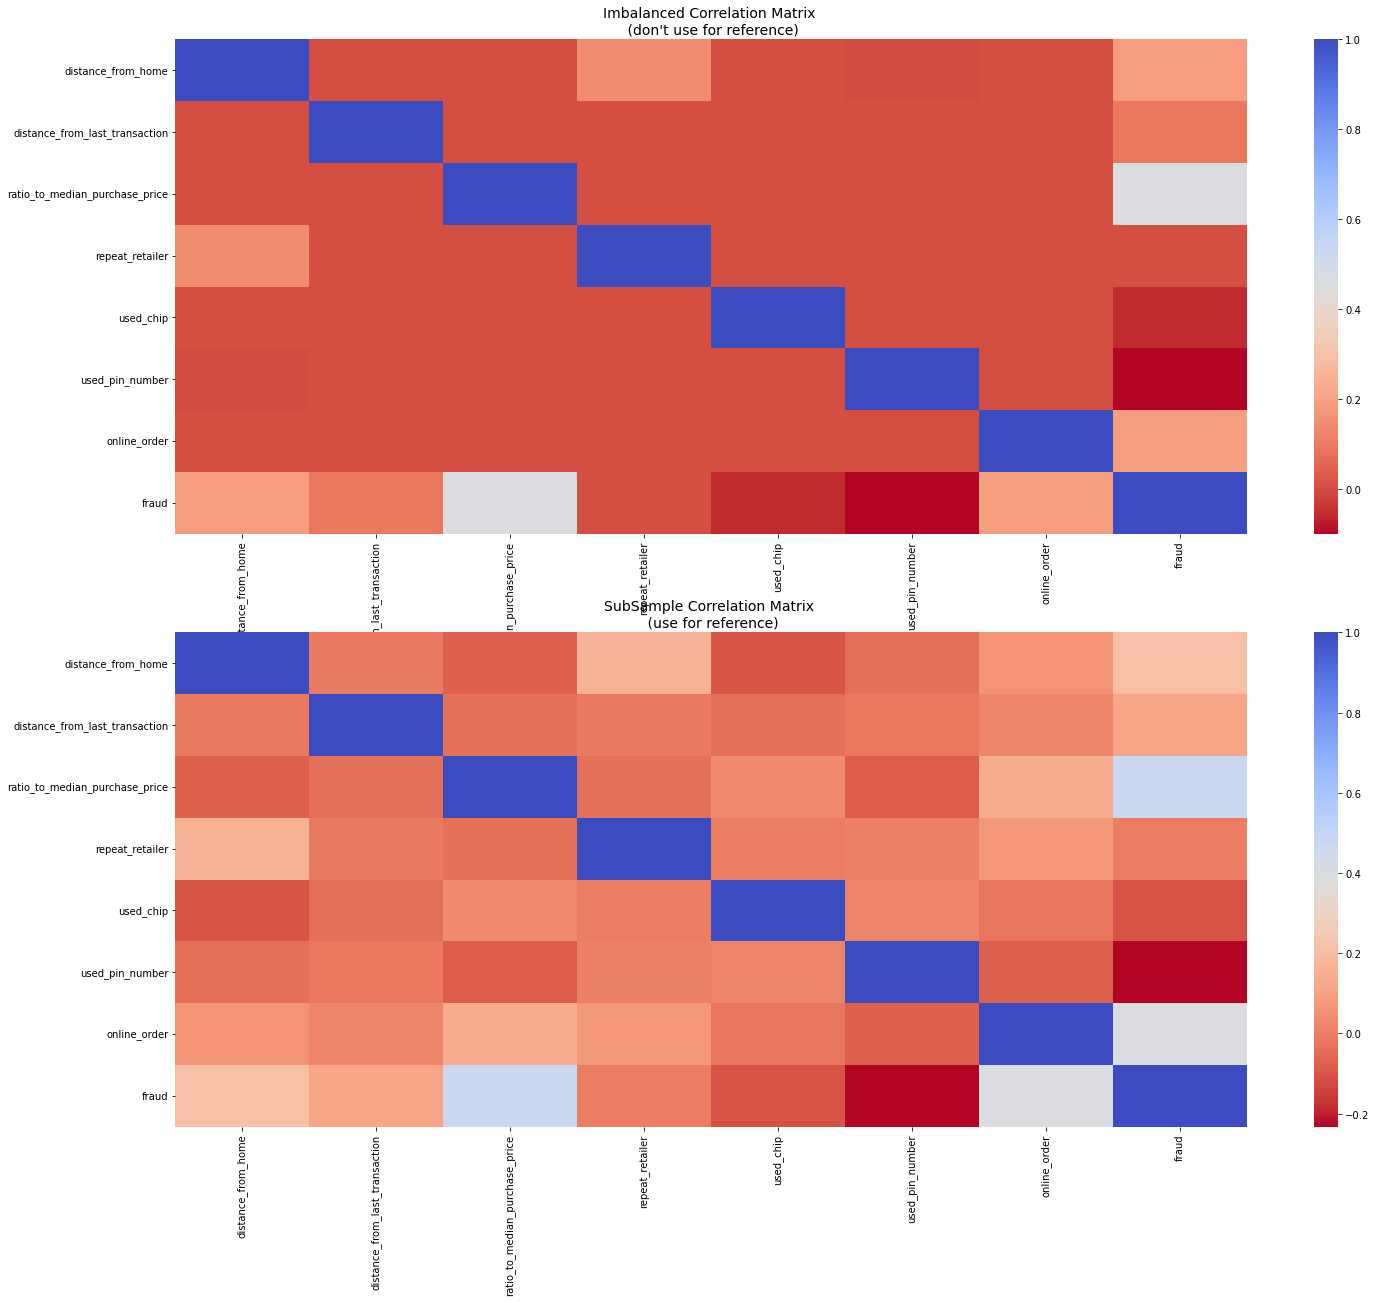

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

# Logistic

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
x = new_df.drop(['fraud'],axis=1)

In [14]:
y = new_df['fraud']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [16]:
logistic = LogisticRegression(max_iter=1000)

In [17]:
model = logistic.fit(x_train, y_train)

In [18]:
prediction = model.predict(x_test)

In [19]:
print("Accuracy - " + str(accuracy_score(y_test,prediction)))
print("Recall - " + str(recall_score(y_test,prediction)))
print("precision - " + str(precision_score(y_test,prediction)))

Accuracy - 0.9414214452427806
Recall - 0.9495286903999268
precision - 0.9343930115273775


C:\Users\smei4\Anaconda3\envs\PythonData38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


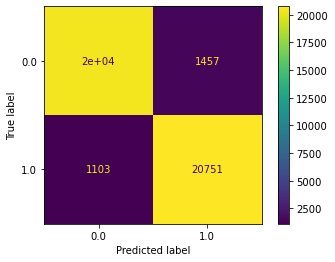

In [20]:
plot_confusion_matrix(logistic,x_test,y_test)

# Random Classifier

In [21]:
x1 = new_df.drop(['fraud'],axis=1)

In [22]:
y1 = new_df['fraud']

In [23]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=42)

In [24]:
randomforest = RandomForestClassifier()

In [25]:
model1 = randomforest.fit(x1_train,y1_train)

In [26]:
prediction1 = model1.predict(x1_test)

In [27]:
accuracy_score(y1_test,prediction1)

1.0

In [28]:
print("Accuracy - " + str(accuracy_score(y1_test,prediction1)))
print("Recall - " + str(recall_score(y1_test,prediction1)))
print("precision - " + str(precision_score(y1_test,prediction1)))

Accuracy - 1.0
Recall - 1.0
precision - 1.0


C:\Users\smei4\Anaconda3\envs\PythonData38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


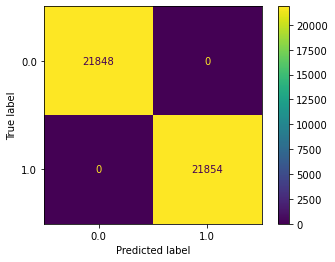

In [29]:
plot_confusion_matrix(randomforest,x1_test,y1_test)

# Decision Tree

In [30]:
x2 = new_df.drop(['fraud'],axis=1)

In [31]:
y2 = new_df['fraud']

In [32]:
dt = DecisionTreeRegressor()

In [33]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.3,random_state=123)
                                                   

In [34]:
model2 = dt.fit(x2_train,y2_train)

In [35]:
prediction2 = model2.predict(x2_test)

In [36]:
print("Accuracy - " + str(accuracy_score(y2_test,prediction2)))
print("Recall - " + str(recall_score(y2_test,prediction2)))
print("precision - " + str(precision_score(y2_test,prediction2)))

Accuracy - 0.9999427939437855
Recall - 1.0
precision - 0.9998856402241452
